## 18-9. 프로젝트 : 다양한 OCR모델 비교하기

In [1]:
import os
from os import listdir
from os.path import isfile, join

# keras
import matplotlib.pyplot as plt
import keras_ocr
import matplotlib.image as img
%matplotlib inline

# tesseract
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'


-rw-rw-rw- 1 ssac15 ssac15 2337  3월 15 16:27 /home/ssac15/aiffel/ocr_python/my_google_api_key.json


### Step1. 검증용 데이터셋 준비
---


#### 아래의 캐글에서 데이터 셋 가져 옴
https://www.kaggle.com/harishml/ocrdataset



In [2]:
# 이미지 파일들의 리스트를 한 번에 얻는 코드
work_dir= os.getenv('HOME')+'/aiffel/ocr_python/images'
img_list = [join(work_dir,f) for f in listdir(work_dir) if isfile(join(work_dir, f))]

img_list.sort()
img_list

['/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0001.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0002.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0003.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0004.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0005.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0006.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0007.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0008.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0009.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0010.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0011.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0012.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0013.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0014.jpeg',
 '/home/ssac15/aiffel/ocr_python/images/FPDATA0401img0015.jpeg',
 '/home/ssac15/aiffel/ocr

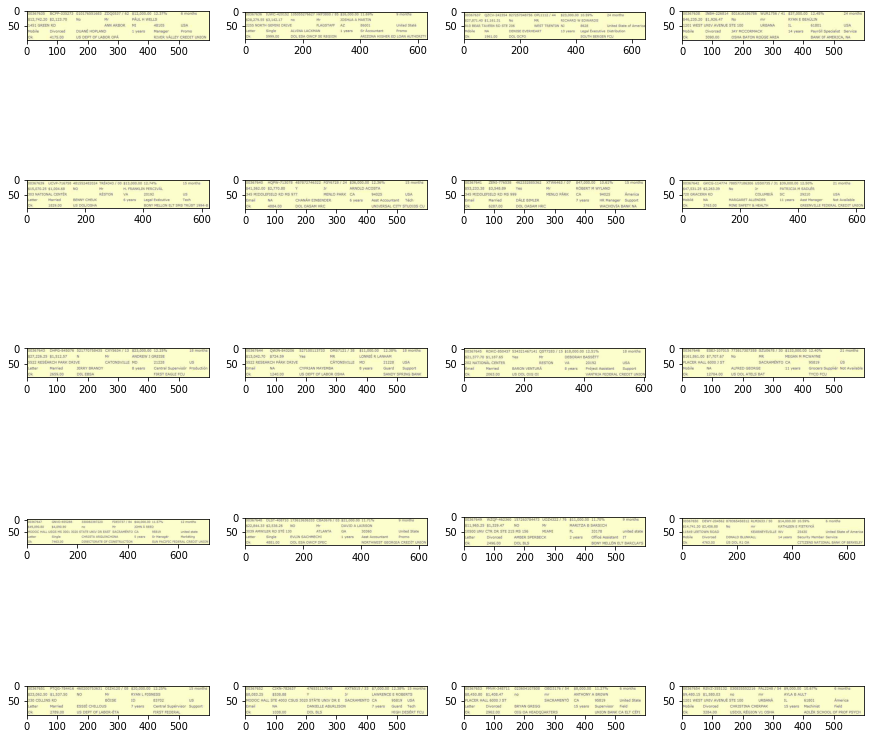

In [3]:
plt.figure(figsize=(15,15))
for idx, im in enumerate(img_list):
    plt.subplot(5,4, idx+1)
    im = img.imread(im)
    plt.imshow(im)

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
---
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 

## 1. GOOGLE API

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts: in '+ path )

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}\n------------------다음 이미지 -------------------\n'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:

for img in img_list:
    detect_text(img)

Texts: in /home/ssac15/aiffel/ocr_python/images/FPDATA0401img0001.jpeg

"00367635
BCPP-335273 010176551683 ZDQ0537 / 62 $12,000.00 12.37%
6 months
$12,742.20 $2,123.70
No
Mr
PÁUL H WELLS
1451 GREEN RD
ANN ARBOR
MI
48105
USA
Mobile
Divorced
DUANÉ HOPLAND
1 years
Manager
Promo
Ok
4175.00
US DEPT OF LABOR OPÅ
RIVER VÅLLEY CREDIT UNION
"

"00367635"

"BCPP-335273"

"010176551683"

"ZDQ0537"

"/"

"62"

"$12,000.00"

"12.37%"

"6"

"months"

"$12,742.20"

"$2,123.70"

"No"

"Mr"

"PÁUL"

"H"

"WELLS"

"1451"

"GREEN"

"RD"

"ANN"

"ARBOR"

"MI"

"48105"

"USA"

"Mobile"

"Divorced"

"DUANÉ"

"HOPLAND"

"1"

"years"

"Manager"

"Promo"

"Ok"

"4175.00"

"US"

"DEPT"

"OF"

"LABOR"

"OPÅ"

"RIVER"

"VÅLLEY"

"CREDIT"

"UNION"
bounds: (554,83),(589,83),(589,90),(554,90)
------------------다음 이미지 -------------------

Texts: in /home/ssac15/aiffel/ocr_python/images/FPDATA0401img0002.jpeg

"00367636
IUWC-420152 105055276627 HKF3800 / 85 $26,000.00 11.69%
9 months
$28,279.55 $3,142.17
no
Mr
JOSHUA 

Texts: in /home/ssac15/aiffel/ocr_python/images/FPDATA0401img0011.jpeg

"00367645
RDKC-850437 53432146714i QST7283 / 15 $18,000.00 12.51%
18 months
$21,377.70 $1,187.65
Yes
Mr
DEBORAH BASSÈTT
202 NATIONÀL CENTER
RESTON
VA
20192
USA
Émail
Married
BARON VENTURÁ
8 years
Próject Assistant
Support
Ok
2063.00
US DOL OIG OI
VANTRIA FEDERAL CREDIT UNION
"

"00367645"

"RDKC-850437"

"53432146714i"

"QST7283"

"/"

"15"

"$18,000.00"

"12.51%"

"18"

"months"

"$21,377.70"

"$1,187.65"

"Yes"

"Mr"

"DEBORAH"

"BASSÈTT"

"202"

"NATIONÀL"

"CENTER"

"RESTON"

"VA"

"20192"

"USA"

"Émail"

"Married"

"BARON"

"VENTURÁ"

"8"

"years"

"Próject"

"Assistant"

"Support"

"Ok"

"2063.00"

"US"

"DOL"

"OIG"

"OI"

"VANTRIA"

"FEDERAL"

"CREDIT"

"UNION"
bounds: (566,83),(601,83),(601,90),(566,90)
------------------다음 이미지 -------------------

Texts: in /home/ssac15/aiffel/ocr_python/images/FPDATA0401img0012.jpeg

"00367646
ESEJ-107015 773817307358 SZU0678 / 30 $133,000.00 12.40%
21 months
$161,861.0

## 2. KERAS

In [6]:

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ssac15/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac15/.keras-ocr/crnn_kurapan.h5


In [7]:
images = [ keras_ocr.tools.read(img) for img in img_list]
prediction_groups = [pipeline.recognize([img]) for img in img_list]

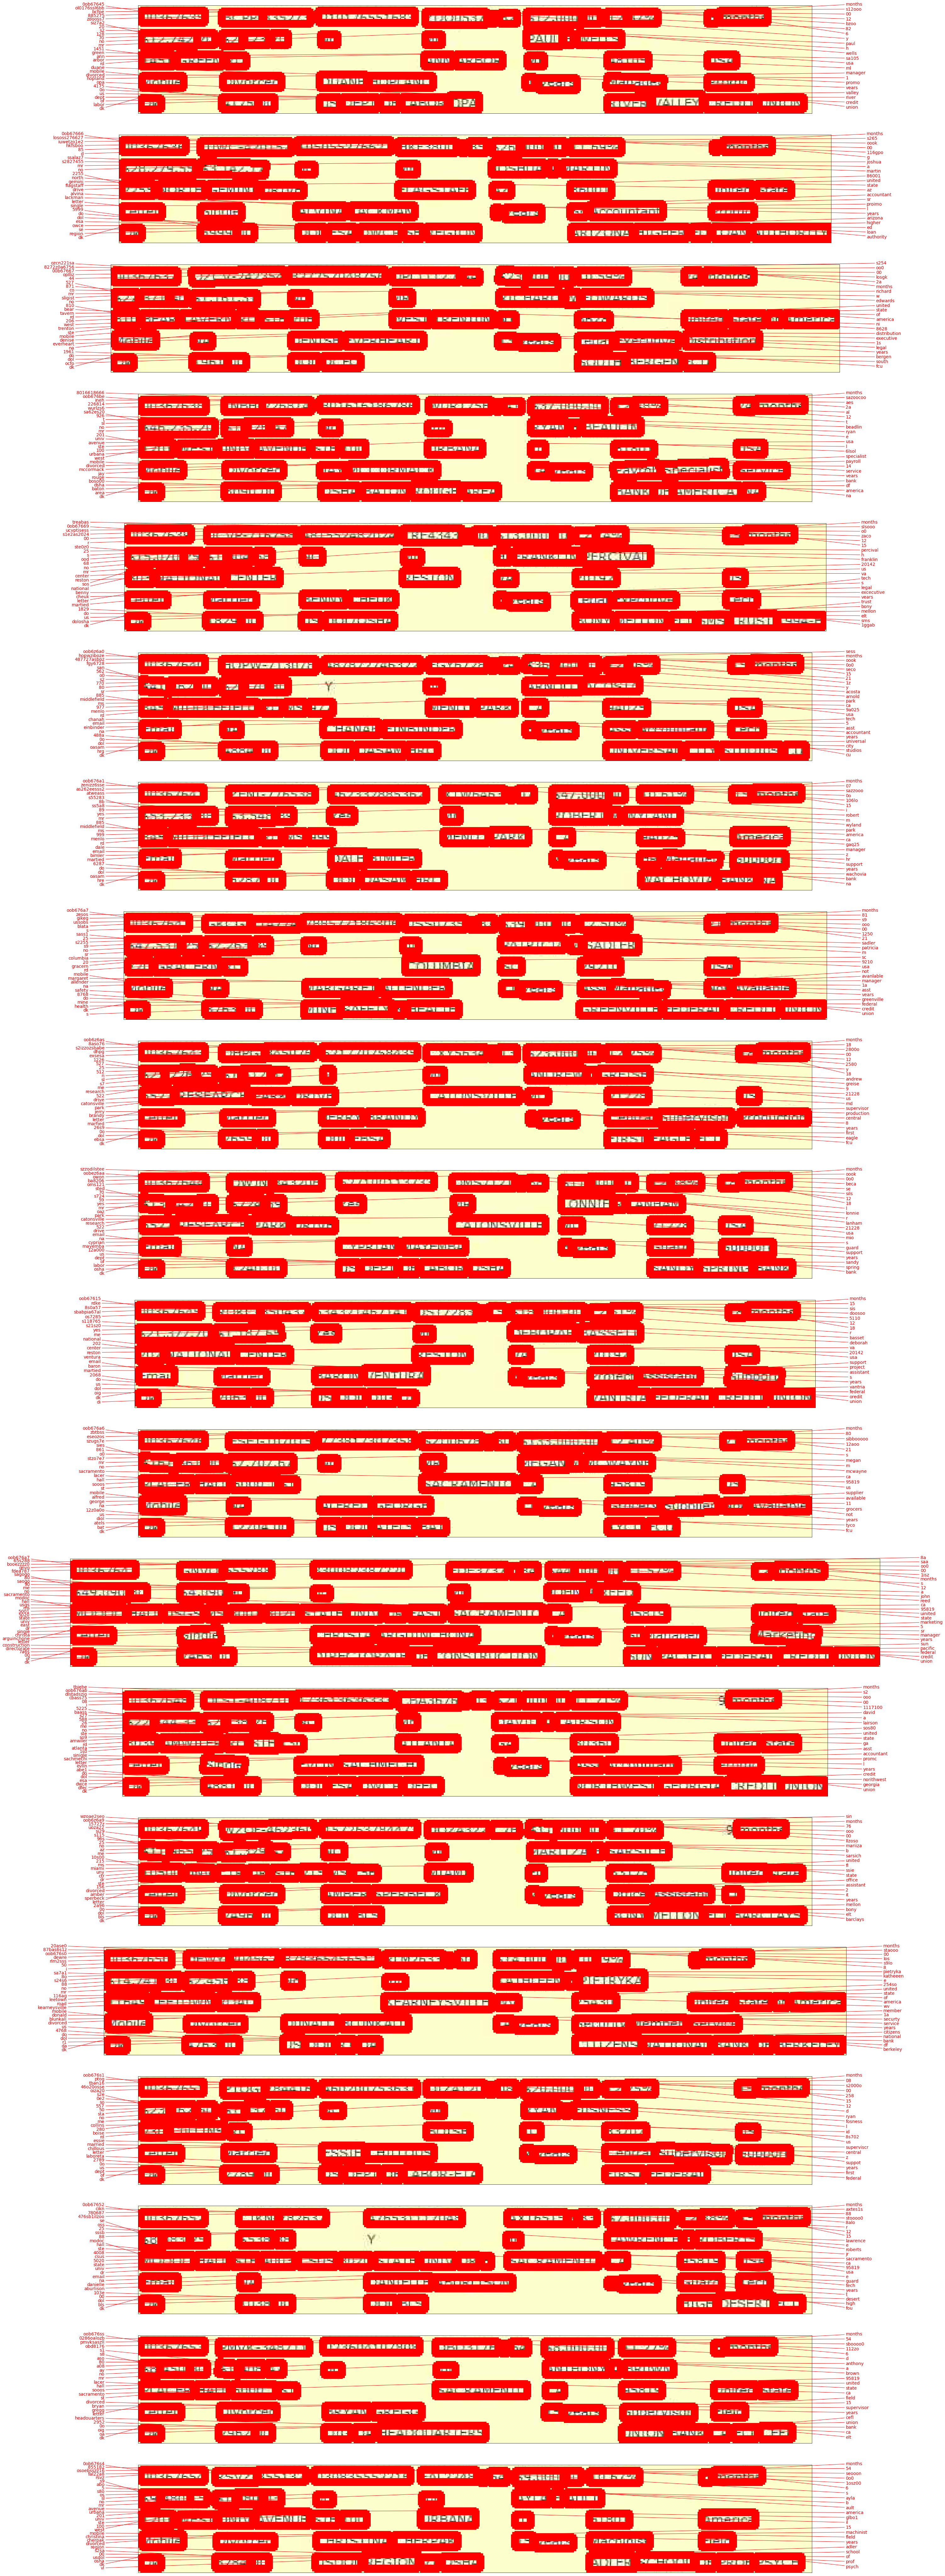

In [19]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(150, 150))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 3. TESSERACT

In [23]:

def crop_word_regions(image_path ='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)
    
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',
        config = custom_oem_psm_config,
        output_type = Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
        
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images/cropped'

for path in img_list:
    cropped_image_path_list = crop_word_regions(path, work_dir)


/home/ssac15/aiffel/ocr_python/images/cropped/0000.png
/home/ssac15/aiffel/ocr_python/images/cropped/0001.png
/home/ssac15/aiffel/ocr_python/images/cropped/0002.png
/home/ssac15/aiffel/ocr_python/images/cropped/0003.png
/home/ssac15/aiffel/ocr_python/images/cropped/0004.png
/home/ssac15/aiffel/ocr_python/images/cropped/0005.png
/home/ssac15/aiffel/ocr_python/images/cropped/0006.png
/home/ssac15/aiffel/ocr_python/images/cropped/0007.png
/home/ssac15/aiffel/ocr_python/images/cropped/0008.png
/home/ssac15/aiffel/ocr_python/images/cropped/0009.png
/home/ssac15/aiffel/ocr_python/images/cropped/0010.png
/home/ssac15/aiffel/ocr_python/images/cropped/0011.png
/home/ssac15/aiffel/ocr_python/images/cropped/0012.png
/home/ssac15/aiffel/ocr_python/images/cropped/0013.png
/home/ssac15/aiffel/ocr_python/images/cropped/0014.png
/home/ssac15/aiffel/ocr_python/images/cropped/0015.png
/home/ssac15/aiffel/ocr_python/images/cropped/0016.png
/home/ssac15/aiffel/ocr_python/images/cropped/0017.png
/home/ssac

/home/ssac15/aiffel/ocr_python/images/cropped/0000.png
/home/ssac15/aiffel/ocr_python/images/cropped/0001.png
/home/ssac15/aiffel/ocr_python/images/cropped/0002.png
/home/ssac15/aiffel/ocr_python/images/cropped/0003.png
/home/ssac15/aiffel/ocr_python/images/cropped/0004.png
/home/ssac15/aiffel/ocr_python/images/cropped/0005.png
/home/ssac15/aiffel/ocr_python/images/cropped/0006.png
/home/ssac15/aiffel/ocr_python/images/cropped/0007.png
/home/ssac15/aiffel/ocr_python/images/cropped/0008.png
/home/ssac15/aiffel/ocr_python/images/cropped/0009.png
/home/ssac15/aiffel/ocr_python/images/cropped/0010.png
/home/ssac15/aiffel/ocr_python/images/cropped/0011.png
/home/ssac15/aiffel/ocr_python/images/cropped/0012.png
/home/ssac15/aiffel/ocr_python/images/cropped/0013.png
/home/ssac15/aiffel/ocr_python/images/cropped/0014.png
/home/ssac15/aiffel/ocr_python/images/cropped/0015.png
/home/ssac15/aiffel/ocr_python/images/cropped/0016.png
/home/ssac15/aiffel/ocr_python/images/cropped/0017.png
/home/ssac

/home/ssac15/aiffel/ocr_python/images/cropped/0000.png
/home/ssac15/aiffel/ocr_python/images/cropped/0001.png
/home/ssac15/aiffel/ocr_python/images/cropped/0002.png
/home/ssac15/aiffel/ocr_python/images/cropped/0003.png
/home/ssac15/aiffel/ocr_python/images/cropped/0004.png
/home/ssac15/aiffel/ocr_python/images/cropped/0005.png
/home/ssac15/aiffel/ocr_python/images/cropped/0006.png
/home/ssac15/aiffel/ocr_python/images/cropped/0007.png
/home/ssac15/aiffel/ocr_python/images/cropped/0008.png
/home/ssac15/aiffel/ocr_python/images/cropped/0009.png
/home/ssac15/aiffel/ocr_python/images/cropped/0010.png
/home/ssac15/aiffel/ocr_python/images/cropped/0011.png
/home/ssac15/aiffel/ocr_python/images/cropped/0012.png
/home/ssac15/aiffel/ocr_python/images/cropped/0013.png
/home/ssac15/aiffel/ocr_python/images/cropped/0014.png
/home/ssac15/aiffel/ocr_python/images/cropped/0015.png
/home/ssac15/aiffel/ocr_python/images/cropped/0016.png
/home/ssac15/aiffel/ocr_python/images/cropped/0017.png
/home/ssac

/home/ssac15/aiffel/ocr_python/images/cropped/0000.png
/home/ssac15/aiffel/ocr_python/images/cropped/0001.png
/home/ssac15/aiffel/ocr_python/images/cropped/0002.png
/home/ssac15/aiffel/ocr_python/images/cropped/0003.png
/home/ssac15/aiffel/ocr_python/images/cropped/0004.png
/home/ssac15/aiffel/ocr_python/images/cropped/0005.png
/home/ssac15/aiffel/ocr_python/images/cropped/0006.png
/home/ssac15/aiffel/ocr_python/images/cropped/0007.png
/home/ssac15/aiffel/ocr_python/images/cropped/0008.png
/home/ssac15/aiffel/ocr_python/images/cropped/0009.png
/home/ssac15/aiffel/ocr_python/images/cropped/0010.png
/home/ssac15/aiffel/ocr_python/images/cropped/0011.png
/home/ssac15/aiffel/ocr_python/images/cropped/0012.png
/home/ssac15/aiffel/ocr_python/images/cropped/0013.png
/home/ssac15/aiffel/ocr_python/images/cropped/0014.png
/home/ssac15/aiffel/ocr_python/images/cropped/0015.png
/home/ssac15/aiffel/ocr_python/images/cropped/0016.png
/home/ssac15/aiffel/ocr_python/images/cropped/0017.png
/home/ssac

/home/ssac15/aiffel/ocr_python/images/cropped/0000.png
/home/ssac15/aiffel/ocr_python/images/cropped/0001.png
/home/ssac15/aiffel/ocr_python/images/cropped/0002.png
/home/ssac15/aiffel/ocr_python/images/cropped/0003.png
/home/ssac15/aiffel/ocr_python/images/cropped/0004.png
/home/ssac15/aiffel/ocr_python/images/cropped/0005.png
/home/ssac15/aiffel/ocr_python/images/cropped/0006.png
/home/ssac15/aiffel/ocr_python/images/cropped/0007.png
/home/ssac15/aiffel/ocr_python/images/cropped/0008.png
/home/ssac15/aiffel/ocr_python/images/cropped/0009.png
/home/ssac15/aiffel/ocr_python/images/cropped/0010.png
/home/ssac15/aiffel/ocr_python/images/cropped/0011.png
/home/ssac15/aiffel/ocr_python/images/cropped/0012.png
/home/ssac15/aiffel/ocr_python/images/cropped/0013.png
/home/ssac15/aiffel/ocr_python/images/cropped/0014.png
/home/ssac15/aiffel/ocr_python/images/cropped/0015.png
/home/ssac15/aiffel/ocr_python/images/cropped/0016.png
/home/ssac15/aiffel/ocr_python/images/cropped/0017.png
/home/ssac

In [24]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang = 'eng',
            config = custom_oem_psm_config,
            output_type = Output.DICT
        )
        print(recognized_data['text'])
    print("Done")
    
recognize_images(cropped_image_path_list)

Dt sb / 654

KS A -aSS )

ave soo ZL

FAL 2248 / 54

$3,000.00

LUb6/ “5

_

mMNonth=

$9,480.15

$1,580.03

Pri


AY?

=

Alii |

LUT

WES |

UNTY

AVENUE

~~ |

Lou

URBANA

tt

STRit

America

Mobile

yorcend

LR iS Pie

reer e Roe

>

Yeats

Machinist

eid

Che

Ss /54 1h)

List LL

DEISTON

Wi

| ps

ADLER

“sf Fit (jt

LF

=~ "20)5

eC

Done


----


### Step3. 테스트 결과 정리
---


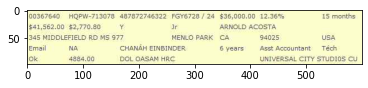

In [27]:
plt.imshow(images[5])

### 구글 결과 샘플 컷

In [25]:
detect_text(img_list[5])

Texts: in /home/ssac15/aiffel/ocr_python/images/FPDATA0401img0006.jpeg

"00367640 HQPW-713078 487872746322 FGY6728 / 24 $36,000.00 12.36%
15 months
$41,562.00 $2,770.80
Y
Jr
ARNOLD ACOSTA
345 MIDDLEFIELD RD MS 977
MENLO PARK CA
94025
USA
Email
NA
CHANÁH EINBINDER
6 years
Asst Accountant
Téch
Ok
4884.00
DOL OASAM HRC
UNIVERSAL CITY STUDIOS CU
"

"00367640"

"HQPW-713078"

"487872746322"

"FGY6728"

"/"

"24"

"$36,000.00"

"12.36%"

"15"

"months"

"$41,562.00"

"$2,770.80"

"Y"

"Jr"

"ARNOLD"

"ACOSTA"

"345"

"MIDDLEFIELD"

"RD"

"MS"

"977"

"MENLO"

"PARK"

"CA"

"94025"

"USA"

"Email"

"NA"

"CHANÁH"

"EINBINDER"

"6"

"years"

"Asst"

"Accountant"

"Téch"

"Ok"

"4884.00"

"DOL"

"OASAM"

"HRC"

"UNIVERSAL"

"CITY"

"STUDIOS"

"CU"
bounds: (586,82),(592,82),(592,93),(586,93)
------------------다음 이미지 -------------------



### 케라스 결과 샘플 컷

In [29]:
print(prediction_groups[5][0])

[('oob6z6a0', array([[ 2.      ,  4.999999],
       [59.999992,  4.999999],
       [59.999992, 15.999997],
       [ 2.      , 15.999997]], dtype=float32)), ('hopwziboze', array([[ 74.,   5.],
       [158.,   5.],
       [158.,  17.],
       [ 74.,  17.]], dtype=float32)), ('487727asbpz', array([[165.,   5.],
       [251.,   5.],
       [251.,  16.],
       [165.,  16.]], dtype=float32)), ('fgy6728', array([[258.,   5.],
       [310.,   5.],
       [310.,  16.],
       [258.,  16.]], dtype=float32)), ('sess', array([[344.13217  ,   4.3566065],
       [372.46133  ,   5.7730656],
       [371.88278  ,  17.34414  ],
       [343.55362  ,  15.927679 ]], dtype=float32)), ('oook', array([[369.,   5.],
       [397.,   5.],
       [397.,  16.],
       [369.,  16.]], dtype=float32)), ('0o0', array([[394.,   5.],
       [410.,   5.],
       [410.,  16.],
       [394.,  16.]], dtype=float32)), ('seco', array([[435.,   5.],
       [461.,   5.],
       [461.,  16.],
       [435.,  16.]], dtype=float32

/home/ssac15/Downloads/downloads/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<AxesSubplot:>

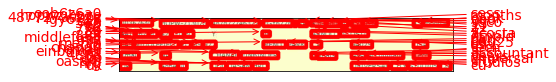

In [30]:
keras_ocr.tools.drawAnnotations(image=images[5],  predictions=prediction_groups[5][0])

### 테서렉트 결과 샘플 컷

In [32]:
recognize_images(cropped_image_path_list)

Dt sb / 654

KS A -aSS )

ave soo ZL

FAL 2248 / 54

$3,000.00

LUb6/ “5

_

mMNonth=

$9,480.15

$1,580.03

Pri


AY?

=

Alii |

LUT

WES |

UNTY

AVENUE

~~ |

Lou

URBANA

tt

STRit

America

Mobile

yorcend

LR iS Pie

reer e Roe

>

Yeats

Machinist

eid

Che

Ss /54 1h)

List LL

DEISTON

Wi

| ps

ADLER

“sf Fit (jt

LF

=~ "20)5

eC

Done


----


## 루브릭
----
평가문항	상세기준

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
    * 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.

--- 

2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?
    * 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.

----

3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
    * 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

## 총평

### OCR 테스트 이미지를 구하기 힘들었음

* LMS 기준 하나 이미지만 처리되는 학습 코드를 이미지의 목록화 해서 돌리도록 재조정함.
* 유료 API 인 구글 킹왕짱
* keras 영문 기준 NOTBAD
* Tessaract는 인식율이 매우 안좋음
